<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n250.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.551373,-4.092035,37.459338,41.331478,-3.872140
1,0.0,1.0,83.011771,0.133860,93.145631,93.180133,-0.034502
2,0.0,2.0,81.605137,-1.503821,90.101316,91.762886,-1.661570
3,0.0,3.0,84.581824,1.920253,96.502077,94.762032,1.740045
4,0.0,4.0,30.892428,0.136132,41.028560,40.667561,0.360999
...,...,...,...,...,...,...,...
249995,999.0,245.0,43.395070,2.020097,55.415168,53.430884,1.984283
249996,999.0,246.0,55.303502,-1.277740,64.025762,65.402425,-1.376663
249997,999.0,247.0,31.534172,0.997080,42.531253,41.507129,1.024123
249998,999.0,248.0,54.435447,-1.025854,63.409593,64.529770,-1.120177


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.551373,-4.092035,37.459338,41.331478,-3.872140
1,0.0,1.0,83.011771,0.133860,93.145631,93.180133,-0.034502
2,0.0,2.0,81.605137,-1.503821,90.101316,91.762886,-1.661570
3,0.0,3.0,84.581824,1.920253,96.502077,94.762032,1.740045
4,0.0,4.0,30.892428,0.136132,41.028560,40.667561,0.360999
...,...,...,...,...,...,...,...
249995,999.0,245.0,43.395070,2.020097,55.415168,53.430884,1.984283
249996,999.0,246.0,55.303502,-1.277740,64.025762,65.402425,-1.376663
249997,999.0,247.0,31.534172,0.997080,42.531253,41.507129,1.024123
249998,999.0,248.0,54.435447,-1.025854,63.409593,64.529770,-1.120177


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.551373,-4.092035,37.459338,41.331478,-3.872140
1,0.0,1.0,83.011771,0.133860,93.145631,93.180133,-0.034502
2,0.0,2.0,81.605137,-1.503821,90.101316,91.762886,-1.661570
3,0.0,3.0,84.581824,1.920253,96.502077,94.762032,1.740045
4,0.0,4.0,30.892428,0.136132,41.028560,40.667561,0.360999
...,...,...,...,...,...,...,...
249995,999.0,245.0,43.395070,2.020097,55.415168,53.430884,1.984283
249996,999.0,246.0,55.303502,-1.277740,64.025762,65.402425,-1.376663
249997,999.0,247.0,31.534172,0.997080,42.531253,41.507129,1.024123
249998,999.0,248.0,54.435447,-1.025854,63.409593,64.529770,-1.120177


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.551373 -4.092035  37.459338  41.331478 -3.872140
      1.0    83.011771  0.133860  93.145631  93.180133 -0.034502
      2.0    81.605137 -1.503821  90.101316  91.762886 -1.661570
      3.0    84.581824  1.920253  96.502077  94.762032  1.740045
      4.0    30.892428  0.136132  41.028560  40.667561  0.360999
...                ...       ...        ...        ...       ...
999.0 245.0  43.395070  2.020097  55.415168  53.430884  1.984283
      246.0  55.303502 -1.277740  64.025762  65.402425 -1.376663
      247.0  31.534172  0.997080  42.531253  41.507129  1.024123
      248.0  54.435447 -1.025854  63.409593  64.529770 -1.120177
      249.0  58.538508  0.104553  68.643061  68.654575 -0.011515

[250000 rows x 5 columns]

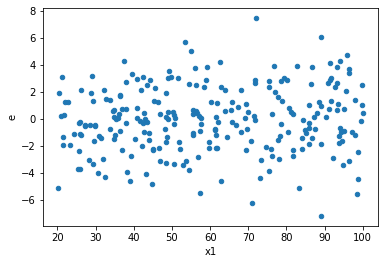

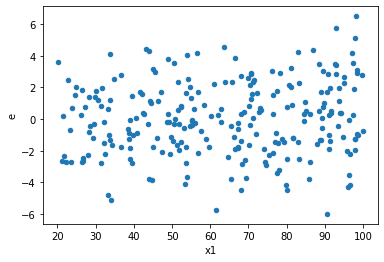

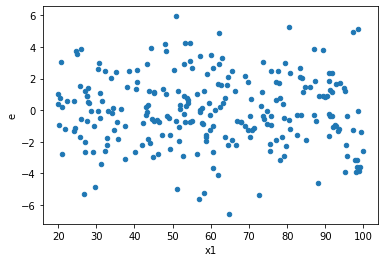

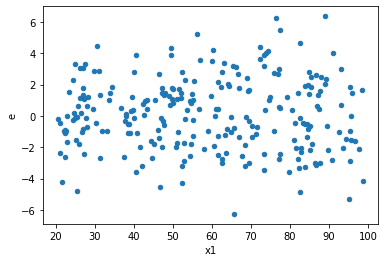

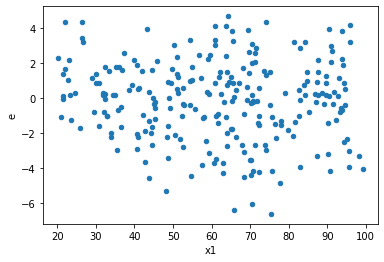

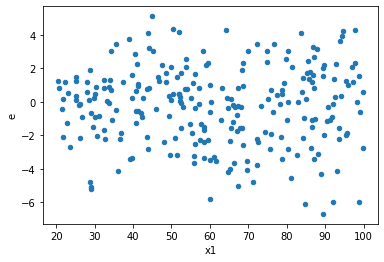

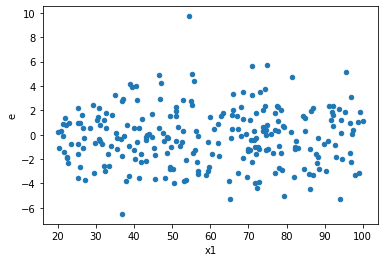

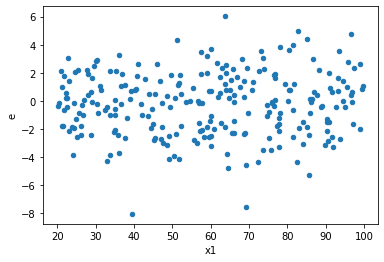

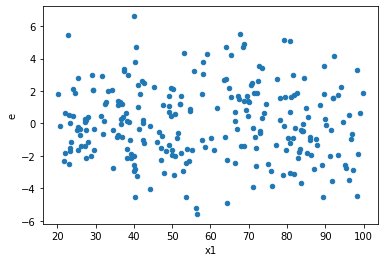

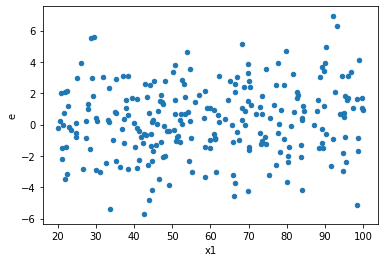

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,394.64476836156086,607.8339299023471,3.9863107915309177,6.139736665680274,1.5402052139849203,0.03275192351840084,0.9836240382407996,0.01637596175920042,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,436.24628199436364,536.6446526048554,4.406528100953168,5.420653056614701,1.2301414929005376,0.3044478925914387,0.8477760537042807,0.15222394629571934,Reject005=1 : Homoscedasticity
2.0,99.0,99.0,369.5063674465016,483.66811719314467,3.732387549964663,4.885536537304492,1.3089574627240268,0.18219567051932373,0.9089021647403381,0.09109783525966186,Reject005=1 : Homoscedasticity
3.0,99.0,99.0,402.75696545108,448.8098533586431,4.0682521762735355,4.5334328622085165,1.114344112847272,0.5911796647537118,0.7044101676231441,0.2955898323768559,Reject005=1 : Homoscedasticity
4.0,99.0,99.0,395.8927559827324,496.57917585377993,3.9989167270983073,5.0159512712503025,1.2543275125636275,0.26131894500085995,0.86934052749957,0.13065947250042997,Reject005=1 : Homoscedasticity
5.0,99.0,99.0,382.38981081826205,744.6667633908986,3.8625233415986067,7.521886498897966,1.9474022118879508,0.0010468480654772794,0.9994765759672614,0.0005234240327386397,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,399.05660411765103,517.2744905482425,4.030874789067182,5.224994854022651,1.2962434030931063,0.1985133108988526,0.9007433445505737,0.0992566554494263,Reject005=1 : Homoscedasticity
7.0,99.0,99.0,503.46303214180864,523.8129137814168,5.085485173149582,5.291039533145624,1.040419813055661,0.8441211488589682,0.5779394255705159,0.4220605744294841,Reject005=1 : Homoscedasticity
8.0,99.0,99.0,446.9140991625414,560.4483923316456,4.51428382992466,5.6610948720368235,1.2540405267630907,0.2617998230263976,0.8691000884868012,0.1308999115131988,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,394.64476836156086,607.8339299023471,3.9863107915309177,6.139736665680274,1.5402052139849203,0.03275192351840084,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,436.24628199436364,536.6446526048554,4.406528100953168,5.420653056614701,1.2301414929005376,0.3044478925914387,Reject005=1 : Homoscedasticity
2.0,99.0,99.0,369.5063674465016,483.66811719314467,3.732387549964663,4.885536537304492,1.3089574627240268,0.18219567051932373,Reject005=1 : Homoscedasticity
3.0,99.0,99.0,402.75696545108,448.8098533586431,4.0682521762735355,4.5334328622085165,1.114344112847272,0.5911796647537118,Reject005=1 : Homoscedasticity
4.0,99.0,99.0,395.8927559827324,496.57917585377993,3.9989167270983073,5.0159512712503025,1.2543275125636275,0.26131894500085995,Reject005=1 : Homoscedasticity
5.0,99.0,99.0,382.38981081826205,744.6667633908986,3.8625233415986067,7.521886498897966,1.9474022118879508,0.0010468480654772794,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,399.05660411765103,517.2744905482425,4.030874789067182,5.224994854022651,1.2962434030931063,0.1985133108988526,Reject005=1 : Homoscedasticity
7.0,99.0,99.0,503.46303214180864,523.8129137814168,5.085485173149582,5.291039533145624,1.040419813055661,0.8441211488589682,Reject005=1 : Homoscedasticity
8.0,99.0,99.0,446.9140991625414,560.4483923316456,4.51428382992466,5.6610948720368235,1.2540405267630907,0.2617998230263976,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      593
Reject005=0 : Heteroscedasticity    407
Name: Result_test, dtype: int64